# Task_7
## Кривая Коха

Кривая Коха один из самых типичных детерминированных фракталов. Она была изобретена в девятнадцатом веке немецким математиком по имени Хельге фон Кох, который, изучая работы Георга Контора и Карла Вейерштрассе, натолкнулся на описания некоторых странных кривых с необычным поведением. Инициатор — прямая линия. Генератор — равносторонний треугольник, стороны которого равны трети длины большего отрезка. Эти треугольники добавляются к середине каждого сегмента снова и снова. В своем исследовании, Мандельброт много экспериментировал с кривыми Коха, и получил фигуры такие как Острова Коха, Кресты Коха, Снежинки Коха и даже трехмерные представления кривой Коха, используя тетраэдр и прибавляя меньшие по размерам тетраэдры к каждой его грани. 


<Figure size 432x288 with 0 Axes>

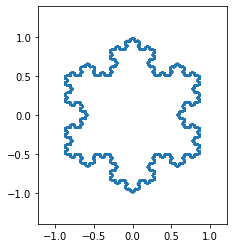

In [1]:
from matplotlib import pyplot as plt
from matplotlib import collections as mc
import math
%matplotlib inline

a = (0.0, 0.0)
e = (1.0, 0.0)
ae = (a,e)

def plot_segments(segments):
    fig, ax = plt.subplots()
    lines = mc.LineCollection(segments)
    ax.add_collection(lines)
    ax.margins(0.2)
    ax.set_aspect('equal')
    ax.autoscale()
    return ax


b = ((2*a[0]+e[0]/3, (2*a[1]+e[1])/3))
d = ((a[0]+2*e[0]/3, (a[1]+2*e[1])/3))

k = math.sqrt(3)/6
c = ((a[0]+e[0])/2 - k * (e[1]-a[1]), (a[1]+e[1])/2 + k *(e[0]-a[0]))


plt.gcf().clear()
def f(seg):
    a = seg[0]
    e = seg[1]
    b = ((2*a[0]+e[0])/3, (2*a[1]+e[1])/3)
    d = ((a[0]+2*e[0])/3, (a[1]+2*e[1])/3)
    k = math.sqrt(3)/6
    c = ((a[0]+e[0])/2 - k * (e[1]-a[1]), (a[1]+e[1])/2 + k *(e[0]-a[0]))
    return [(a,b), (b,c), (c,d), (d,e)]

# plot_segments(f(((0,0),(1,0))));

# plot_segments(f(((0,0),(0,1))));

# plot_segments(f(((2, 3), (2 + math.cos(math.pi/3), 3 + math.sin(math.pi/3)))));

def recurse(segments):
    return [x for s in segments for x in f(s)]

recurse([(a,e)])

# plot_segments(recurse([(a,e)]));

segements = [(a,e)]
for i in range(2):
    segements = recurse(segements)
# plot_segments(segements);


def snowflake(n):
    p = -math.cos(math.pi/6), math.sin(math.pi/6)
    q = math.cos(math.pi/6), math.sin(5*math.pi/6)
    r = 0.0, -1.0
    segments = [(p,q), (q,r), (r,p)]
    for i in range(n):
        segments = recurse(segments)
    plot_segments(segments)
    
snowflake(10)